# Metropolis-Hastings for a complex PDF

Generate samples from a complex probability density function using Metropolis algorithm.

In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

In [6]:
def pdf(x, a, b):
    """Complex (piece-wise) PDF function."""
    
    # Preconditions
    assert isinstance(x, float)
    
    if x < 0:
        return 0
    elif x < 0.5:
        return a + math.sin(4 * math.pi * x)
    elif x < 0.75:
        return a
    elif x < 1:
        return 4*(b-a)*(x-1) + b
    else:
        return 0

In [38]:
a = 8/9
b = 16/9
x_values = np.linspace(-0.1, 1.1, 50)
y_pdf = [pdf(xi, a, b) for xi in x_values]

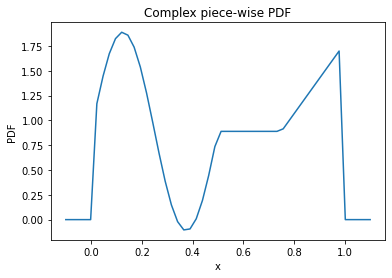

In [40]:
plt.plot(x_values, y_pdf)
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Complex piece-wise PDF')
plt.show()

In [32]:
# Number of samples to draw
N = 100000

# Vector for storing samples
x = np.zeros(N)

# Starting value
x[0] = 0.5

In [33]:
for i in range(1, N):
    
    # Proposal function: Normal distribution centred at x[i-1] with a
    # standard deviation of 0.05
    x_c = stats.norm(x[i-1], 0.05).rvs()
    
    # Probability of the proposal sample and the previous sample
    p_c = pdf(x_c, a, b)
    p_p = pdf(x[i-1], a, b)
    
    # Sample from a uniform distribution
    u = stats.uniform().rvs()
    
    # Generate the new sample
    if p_p == 0:
        x[i] = x[i-1]
    elif u < min(1, p_c/p_p):
        x[i] = x_c
    else:
        x[i] = x[i-1]

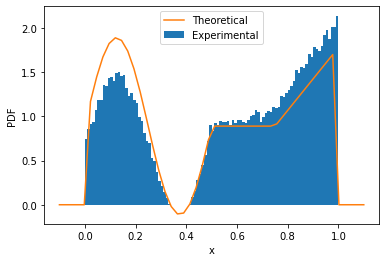

In [47]:
plt.hist(x, bins=100, density=True, label="Experimental")
plt.plot(x_values, y_pdf, label="Theoretical")
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.show()